**Name:** Rishabh Roy

**Phone:** 9111717731

**Email:** rishabh25126@gmail.com

# Task 4 - To Explore Decision Tree Algorithm

For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.


Dataset :
https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing


## Import all the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Get the data

Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing



In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rishabh25126/TheSparkFoundation-DA-ML/master/datasets/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Explore the data

Shape of the data

In [3]:
df.shape

(150, 6)

Our data contains 150 rows and 6 columns Let's get the name of the columns


In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Pandas .info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. To get a quick overview of the dataset we use the .info() function.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Let's see what are the Species of flowers we are dealing with using .unique()

In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

see the quantity of the species in the dataset just use .value_counts()

In [7]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

# Visualize the data
Lets visualise the dataset we have been provided...



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


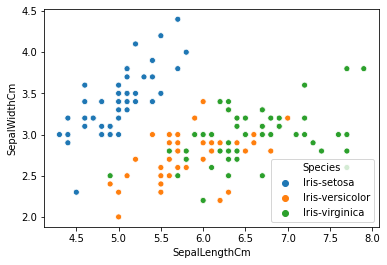

In [8]:
import seaborn as sns
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue="Species")

## Cleaning the data
Let's check if out data has any null values.

In [9]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

Oh, our data has no null values.

Its a good practice to create a copy of our dataframe to go some computational work

In [10]:
df1 = df.copy()

# Prepare Data for ML model
## Handling Text and Categorical Attributes

Earlier we left out the categorical attribute ocean_proximity because it is a text attribute so we cannot compute its median. Most Machine Learning algorithms pre‐ fer to work with numbers anyway, so let’s convert these text labels to numbers.

Scikit-Learn provides a transformer for this task called LabelEncoder:

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_cat = df1["Species"]
df_cat_encoded = encoder.fit_transform(df_cat)
df_cat_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

This is better: now we can use this numerical data in any ML algorithm. You can look at the mapping that this encoder has learned using the classes_ attribute:

In [12]:
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Replacing the Species with encoded data

In [13]:
df1['Species'] = df_cat_encoded


making a input metrics of features 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' and target metric of "Species"

In [14]:
inputs = df1[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
target = df1[['Species']].values.ravel()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.15, random_state=1)
print("Training set size: {}, Testing set size: {} ".format(len(X_train), len(X_test)))

Training set size: 127, Testing set size: 23 


# Decision Tree Classifier
A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules. 

Initializing DecisionTreeClassifier()

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

Training the model

In [17]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Finally our model has been trained successfully... its time to predict.

In [18]:
pred = model.predict(X_test)
pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1])

In [19]:
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1])

## Cost Function 
A cost function is a measure of how wrong the model is in terms of its ability to estimate the relationship between X and y. This is typically expressed as a difference or distance between the predicted value and the actual value.

In [20]:
from sklearn.metrics import mean_squared_error
print("MSE:" , mean_squared_error(y_test, pred))

MSE: 0.0


Our loss is 0... Thats great !!!!

## Cross-validation
Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data.

In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_test, y_test)
print("Cross-Validation scores -----> Mean: {} Standard-Deviation: {}".format(scores.mean(), scores.std()))

Cross-Validation scores -----> Mean: 1.0 Standard-Deviation: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Cross-Validation scores looks promising...

## Acuuracy score

In [22]:
from sklearn.metrics import accuracy_score
print("Accuracy is: {}".format(accuracy_score(y_test,pred)))

Accuracy is: 1.0
